In [117]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [118]:
Bank = pd.read_csv("C:/Users/MRIGESHA/Desktop/EXCELR/Assignments/Logistic Regression/bank-full.csv", delimiter = ',')

In [119]:
Bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [120]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [121]:
Bank.job.values

array(['management', 'technician', 'entrepreneur', ..., 'retired',
       'blue-collar', 'entrepreneur'], dtype=object)

In [122]:
Bank.marital.values

array(['married', 'single', 'married', ..., 'married', 'married',
       'married'], dtype=object)

In [123]:
Bank.education.values

array(['tertiary', 'secondary', 'secondary', ..., 'secondary',
       'secondary', 'secondary'], dtype=object)

In [124]:
Bank.default.values

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [125]:
Bank['job'] = Bank['job'].astype('category')
Bank['marital'] = Bank['marital'].astype('category')
Bank['education'] = Bank['education'].astype('category')
Bank['default'] = Bank['default'].astype('category')
Bank['housing'] = Bank['housing'].astype('category')
Bank['loan'] = Bank['loan'].astype('category')
Bank['contact'] = Bank['contact'].astype('category')
Bank['poutcome'] = Bank['poutcome'].astype('category')
Bank['y'] = Bank['y'].astype('category')
Bank['month'] = Bank['month'].astype('category')

In [126]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [127]:
Bank.shape

(45211, 17)

In [128]:
Bank[Bank.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [129]:
Bank_1 = Bank.copy()

In [130]:
feature_column = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']
target_column = ['y']

In [131]:
X = Bank_1[feature_column]
Y = Bank_1[target_column]

In [132]:
X = pd.get_dummies(X)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AE84073F40>,
      dtype=object)

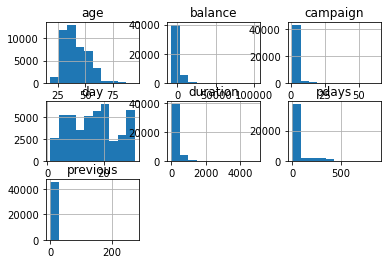

In [133]:
Bank.hist()

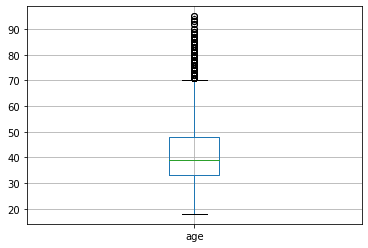

In [134]:
Bank.boxplot(column = 'age')

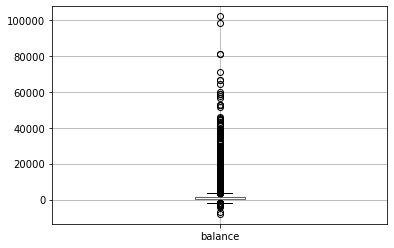

In [135]:
Bank.boxplot(column = 'balance')

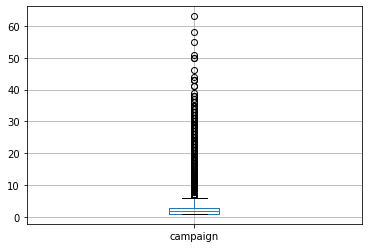

In [136]:
Bank.boxplot(column = 'campaign')

In [137]:
X

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [138]:
Y

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


In [139]:
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\MRIGESHA\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\MRIGESHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [140]:
classifier.coef_ # coefficients of features

array([[-2.09685930e-02,  2.09516081e-05, -1.17809567e-02,
         3.82963875e-03, -3.82903952e-01,  2.55644686e-03,
        -1.14916838e-01, -2.54844151e-02, -2.47448570e-01,
        -2.67608890e-02, -9.22804562e-03,  6.39207715e-03,
         1.63051824e-01, -1.60978956e-02, -8.69908741e-02,
         2.94168051e-02, -6.88859172e-02,  2.42912391e-03,
         2.18620529e-03,  1.61760665e-02, -1.70516697e-01,
        -1.23079941e-01, -6.88178709e-02, -2.66890676e-01,
         4.51906776e-02,  1.30972979e-02, -2.57557345e-01,
        -1.98632266e-02,  3.55804933e-01, -6.33225504e-01,
        -8.15826858e-02, -1.95837885e-01,  9.03895078e-02,
         4.93173336e-02, -4.17127413e-01,  4.29278971e-02,
         1.95709256e-02,  2.83792147e-02, -1.46599796e-02,
        -1.44102411e-02, -8.38698564e-02, -5.53209324e-02,
         8.60153730e-02, -4.00847419e-01, -5.62856345e-02,
         9.74862092e-02,  7.35938724e-02, -1.33505514e-01,
        -3.17368242e-02,  3.08370493e-01, -4.20548726e-0

In [141]:
classifier.predict_proba (X) # Probability values 

array([[0.96170463, 0.03829537],
       [0.97669013, 0.02330987],
       [0.98039159, 0.01960841],
       ...,
       [0.32209093, 0.67790907],
       [0.91240508, 0.08759492],
       [0.85854186, 0.14145814]])

In [142]:
y_pred = classifier.predict(X)

In [143]:
y_pred

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

In [144]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_pred,Y)
print (confusion_matrix)

[[39144  4105]
 [  778  1184]]


In [145]:
Sensitivity = 39144/(39144+778)
Sensitivity

0.9805119983968739

In [146]:
Specificity = 1184/(1184+4105)
Specificity

0.22386084325959538

In [148]:
Accuraccy = (39144+1184)/(39144+1184+4105+778)
Accuraccy

0.8919953108756719

In [ ]:
# Overall Remarks

#True Positive rate is good. We will have to increase the accuracy of True Negative values.